<a href="https://colab.research.google.com/github/ashtonsouthwick/DSPS_ASouthwick/blob/main/HW5/Problem2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

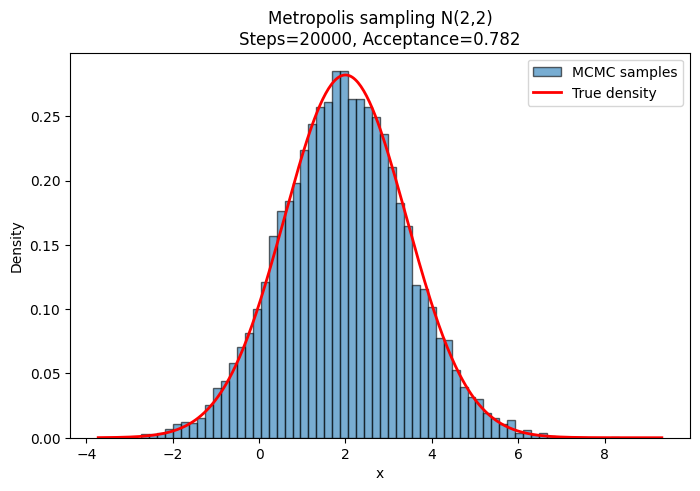

Acceptance rate: 0.782
Sample mean (post-burn): 1.963
Sample variance (post-burn): 2.093


In [4]:
#Target density: Gaussian N(mu=2, var=2)
mu = 2.0
sigma2 = 2.0
sigma = np.sqrt(sigma2)
def p_density(x): #pdf function
    return norm.pdf(x, loc=mu, scale=sigma) # pdf of mu=2, var=2 gaussian... target density

#Proposal: q(x'|x) = Normal(x, 1) -> Given x, propose x' from Gaussian centered at x, with standard dev = 1
prop_sd = 1.0

# Metropolis sampler
n_steps = 20000
x = 0.0
samples = np.empty(n_steps)
accepted = 0

np.random.seed(67)

for i in range(n_steps):
    x_prop = np.random.normal(loc=x, scale=prop_sd)  # propose new point x'
    alpha = p_density(x_prop) / p_density(x) # compute acceptance ratio
    if np.random.rand() < min(1.0, alpha): #draw random number between 0 and 1, if less than min(1,alpha), accept it, if not stay at same x
        x = x_prop
        accepted += 1
    samples[i] = x

accept_rate = accepted / n_steps #how often proposals were accepted

# Burn-in... first few steps depend heavy on starting point, so get rid of the first ~1000
burn_in = 1000
thin_samples = samples[burn_in:]

fig, ax = plt.subplots(figsize=(8,5))
ax.hist(thin_samples, bins=60, density=True, alpha=0.6, edgecolor='k', label="MCMC samples")

x_grid = np.linspace(min(thin_samples)-1, max(thin_samples)+1, 400)
ax.plot(x_grid, norm.pdf(x_grid, loc=mu, scale=sigma), 'r-', lw=2, label="True density")

ax.set_xlabel("x")
ax.set_ylabel("Density")
ax.set_title(f"Metropolis sampling N(2,2)\nSteps={n_steps}, Acceptance={accept_rate:.3f}")
ax.legend()
plt.show()

print(f"Acceptance rate: {accept_rate:.3f}")
print(f"Sample mean (post-burn): {thin_samples.mean():.3f}")
print(f"Sample variance (post-burn): {thin_samples.var(ddof=1):.3f}")


Caption: Histogram of samples generated by the Metropolis-Hastings algorithm targeting N(2,2). The red curve shows the true Gaussian density. The close agreement between the histogram and  true density indicate that the sampler has converged properly